In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from astropy.time import Time

In [2]:
def convert_to_ap_Time(df, key):
    print(key)
    df[key] = pd.to_datetime(df[key])
    df[key] = Time([t1.astype(str) for t1 in  df[key].values], format="isot")
    return df

def convert_times_to_datetime(df):
    columns = ["Gun Time", "Chip Time", "TOD", "Beat the Bridge", "Beat the Bridge.1"]
    
    for key in columns:
        df = convert_to_ap_Time(df, key)
        df = convert_Time_to_seconds(df, key)
    return df

def convert_Time_to_seconds(df, key):
    t0 = Time("2017-05-04T00:00:00.000", format="isot")
    df["sub" + key] = df[key] - t0
    df["sub" + key] = [t.sec for t in df["sub" + key].values]
    return df

def find_astronomers(df):
    astronomers = ("Robert FIRTH", "Stephen BROWETT", "Mathew SMITH", "Sadie JONES")
    astro_df = df[df["Name"].isin((astronomers))]
    return astro_df

def plot_hist_with_astronomers(df, astro_df, key):
    rob_time = astro_df[key][158]/60.
    mat_time = astro_df[key][737]/60.
    steve_time = astro_df[key][1302]/60.
    sadie_time = astro_df[key][576]/60.

    mean_time = df[key].mean()/60
    median_time = df[key].median()/60

    plt.hist(df[key]/60., bins = 100)

    plt.plot([rob_time, rob_time], [0, 70], lw = 2, label = "Rob")
    plt.plot([mat_time, mat_time], [0, 70], lw = 2, label = "Mat")
    plt.plot([steve_time, steve_time], [0, 70], lw = 2, label = "Steve")
    plt.plot([sadie_time, sadie_time], [0, 70], lw = 2, label = "Sadie")

    plt.plot([mean_time, mean_time], [0, 70], lw = 2, color = "Black", ls = ":", label = "Mean")
    plt.plot([median_time, median_time], [0, 70], lw = 2, color = "Black", ls = "--", label = "Median")
    plt.xlabel(key.replace("sub", "") + " Minutes")

    plt.legend()

In [3]:
results_path = "/Users/berto/Code/zoidberg/ABPSoton10k/data/Results10k.csv"

df = pd.read_csv(results_path)
# df = df.drop(df.index[len(df)-10:])
df = df.drop(df.loc[df["Gun Time"] == "DNF"].index)
df = df.drop(df.loc[df["Gun Time"] == "QRY"].index)
df = df.drop(df.loc[df["Beat the Bridge"] == "99:99:99"].index)

In [4]:
df.columns

Index(['Pos', 'Bib No', 'Fav', 'Share', 'Print', 'Name', 'Gun Time',
       'Chip Time', 'Category', 'Cat Pos', 'Gender', 'Gen Pos', 'Club', 'Pace',
       'TOD', 'Beat the Bridge', 'G/Pos', 'Beat the Bridge.1', 'G/Pos.1'],
      dtype='object')

In [5]:
df = convert_times_to_datetime(df)

Gun Time
Chip Time
TOD
Beat the Bridge
Beat the Bridge.1


In [6]:
astro_df = find_astronomers(df)

In [7]:
astro_df

,Pos,Bib No,Fav,Share,Print,Name,Gun Time,Chip Time,Category,Cat Pos,...,TOD,Beat the Bridge,G/Pos,Beat the Bridge.1,G/Pos.1,subGun Time,subChip Time,subTOD,subBeat the Bridge,subBeat the Bridge.1
158,159,1662,NaN,NaN,NaN,Robert FIRTH,2017-05-04T00:48:59.600,2017-05-04T00:48:07.600,Sen,89,...,2017-05-04T11:19:05.600,2017-05-04T00:08:38.900,125,2017-05-04T00:08:38.900,125,2939.6,2887.6,40745.6,518.9,518.9
576,577,1560,NaN,NaN,NaN,Sadie JONES,2017-05-04T00:59:35.600,2017-05-04T00:55:00.400,Sen,123,...,2017-05-04T11:29:41.600,2017-05-04T00:09:27.200,80,2017-05-04T00:09:27.200,80,3575.6,3300.4,41381.6,567.2,567.2
737,738,1165,NaN,NaN,NaN,Mathew SMITH,2017-05-04T01:01:54.300,2017-05-04T00:56:49.400,Sen,276,...,2017-05-04T11:32:00.300,2017-05-04T00:09:52.100,316,2017-05-04T00:09:52.100,316,3714.3,3409.4,41520.3,592.1,592.1
1302,1303,1915,NaN,NaN,NaN,Stephen BROWETT,2017-05-04T01:14:55.000,2017-05-04T01:09:49.700,Sen,364,...,2017-05-04T11:45:01.000,2017-05-04T00:12:50.800,614,2017-05-04T00:12:50.800,614,4495.0,4189.7,42301.0,770.8,770.8


<IPython.core.display.Javascript object>


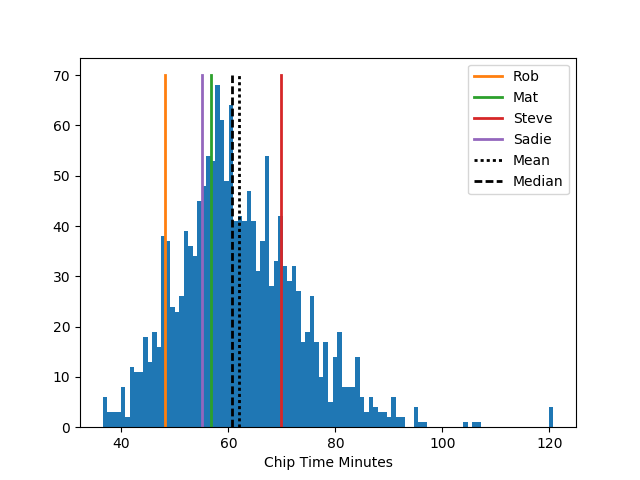

In [18]:
# key = "subGun Time"
key = "subChip Time"

rob_time = astro_df[key][158]/60.
mat_time = astro_df[key][737]/60.
steve_time = astro_df[key][1302]/60.
sadie_time = astro_df[key][576]/60.

mean_time = df[key].mean()/60
median_time = df[key].median()/60

plt.hist(df[key]/60., bins = 100)

plt.plot([rob_time, rob_time], [0, 70], lw = 2, label = "Rob")
plt.plot([mat_time, mat_time], [0, 70], lw = 2, label = "Mat")
plt.plot([steve_time, steve_time], [0, 70], lw = 2, label = "Steve")
plt.plot([sadie_time, sadie_time], [0, 70], lw = 2, label = "Sadie")


plt.plot([mean_time, mean_time], [0, 70], lw = 2, color = "Black", ls = ":", label = "Mean")
plt.plot([median_time, median_time], [0, 70], lw = 2, color = "Black", ls = "--", label = "Median")
plt.xlabel(key.replace("sub", "") + " Minutes")
plt.legend()

<IPython.core.display.Javascript object>


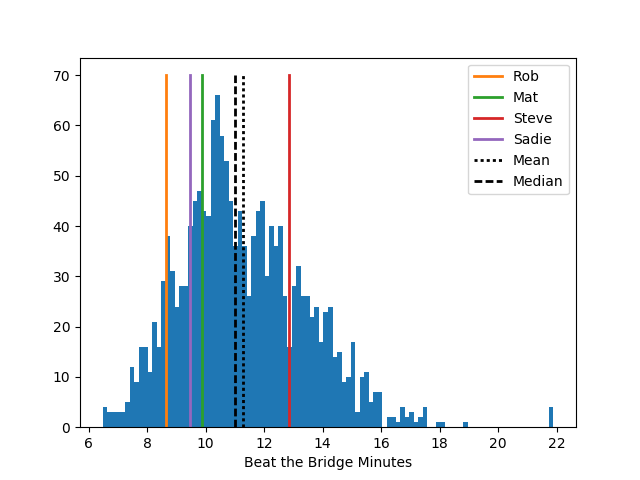

In [20]:
plot_hist_with_astronomers(df=df, astro_df=astro_df, key="subBeat the Bridge")

## Chip Time vs Bridge Time

<IPython.core.display.Javascript object>


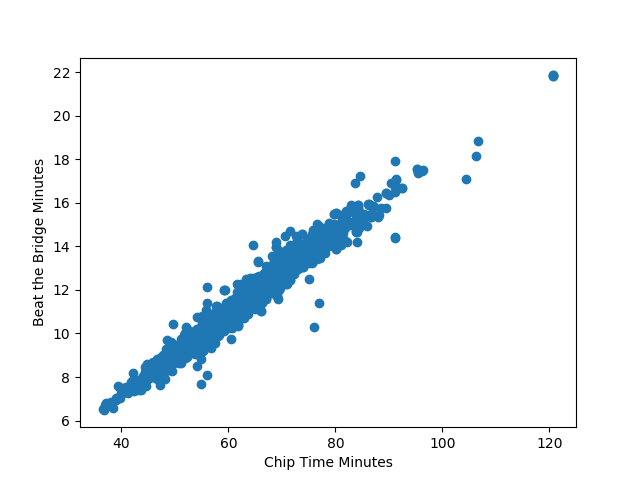

In [21]:
keyx = "subChip Time"
keyy = "subBeat the Bridge"

corr_co = np.corrcoef(df[keyx]/60., df[keyy]/60.)

plt.scatter(df[keyx]/60., df[keyy]/60.)

plt.xlabel(keyx.replace("sub", "") + " Minutes")
plt.ylabel(keyy.replace("sub", "") + " Minutes")

In [22]:
print(corr_co[1,0])

0.981240820274


## Time vs Bib Number

<IPython.core.display.Javascript object>


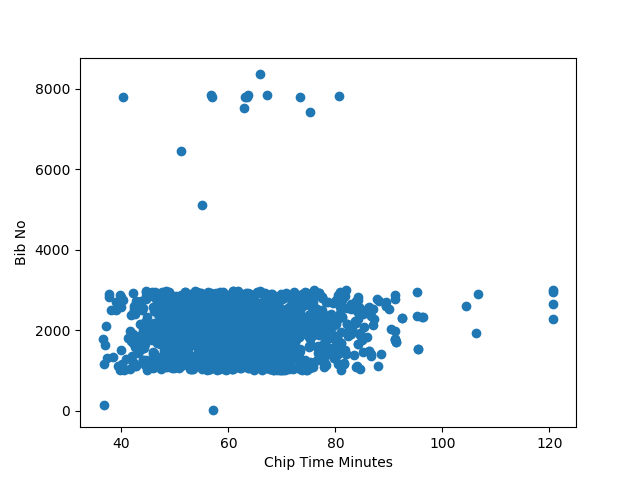

In [23]:
keyx = "subChip Time"
keyy = "Bib No"

corr_co = np.corrcoef(df[keyx]/60., df[keyy])

plt.scatter(df[keyx]/60., df[keyy])

plt.xlabel(keyx.replace("sub", "") + " Minutes")
plt.ylabel(keyy.replace("sub", ""))

In [24]:
print(corr_co[1,0])

0.0808167937219


<IPython.core.display.Javascript object>


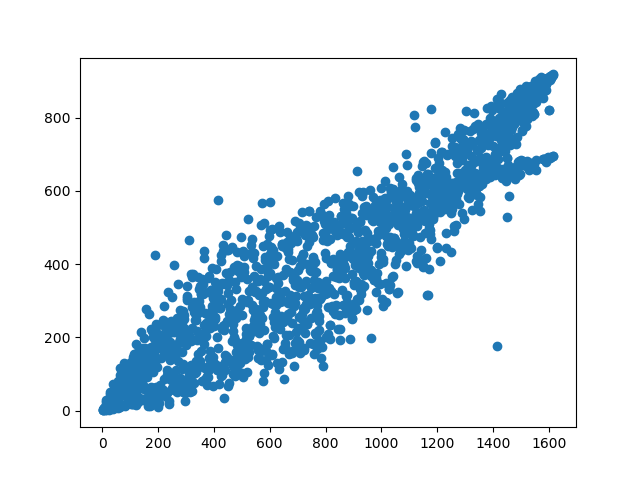

In [25]:
# plt.scatter(df["Pos"], df["subChip Time"])
# plt.scatter(df["subChip Time"], df["subBeat the Bridge"])
plt.scatter(df["Pos"], df["G/Pos"])

<IPython.core.display.Javascript object>


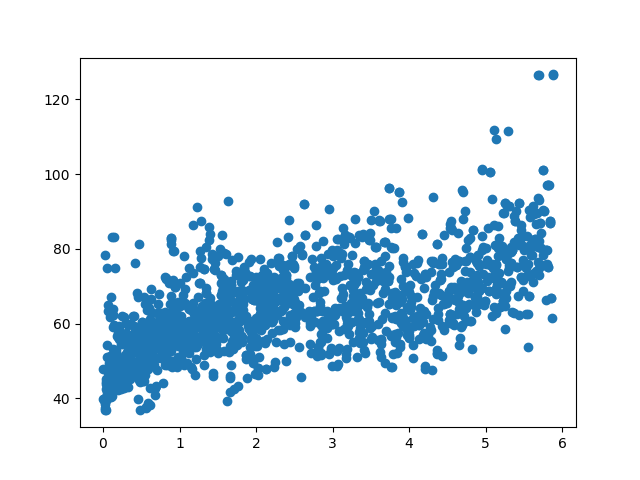

In [29]:
# print(df.groupby("Gender"))
plt.scatter((df["subGun Time"] - df["subChip Time"])/60., df["subGun Time"]/60.)

In [28]:
# plt.scatter(df["subChip Time"]/60., df["Bib No"])

In [17]:
# df.

SyntaxError: invalid syntax (<ipython-input-17-d230d845cd15>, line 1)

In [ ]:
# df.columns

<IPython.core.display.Javascript object>


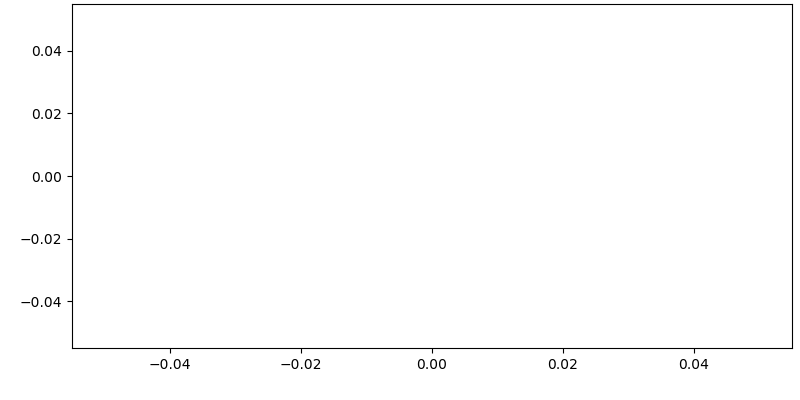

In [30]:
# fig = plt.figure(figsize=[8, 4])
# fig.subplots_adjust(left = 0.09, bottom = 0.13, top = 0.99,
#                     right = 0.99, hspace=0, wspace = 0)

# ax1 = fig.add_subplot(111)

# ax1.scatter(df[df["Club"] == "NaN"]["subChip Time"]/60., df[df["Club"] == "NaN"]["subBeat the Bridge"]/60., color = "Orange")
# ax1.scatter(df[df["Club"] != "NaN"]["subChip Time"]/60., df[df["Club"] != "NaN"]["subBeat the Bridge"]/60., color = "Blue")

In [31]:
clubs = df["Club"].unique()

In [32]:
clubs = [clubs[i] for i in np.arange(len(clubs)) if i != 1]

<IPython.core.display.Javascript object>


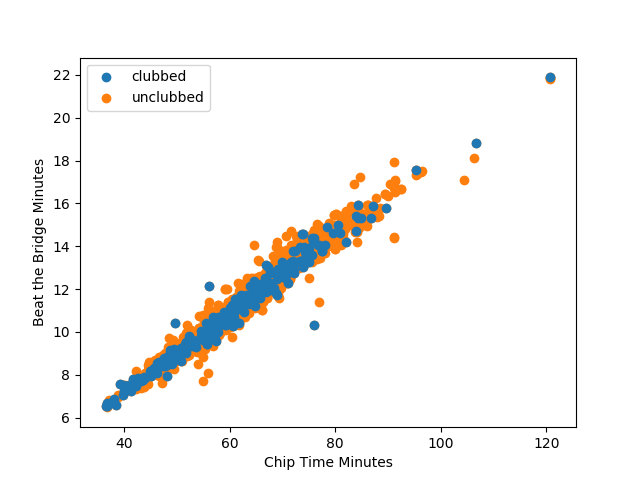

In [38]:
keyx = "subChip Time"
keyy = "subBeat the Bridge"

corr_co = np.corrcoef(df[keyx][df["Club"].isin(clubs)]/60., df[keyy][df["Club"].isin(clubs)]/60.)

plt.scatter(df[keyx][df["Club"].isin(clubs)]/60., df[keyy][df["Club"].isin(clubs)]/60., label = "clubbed")
# plt.scatter(df[keyx][df["Club"].isin(np.invert(clubs))]/60., df[keyy][df["Club"].isin(np.invert(clubs))]/60.)
keyx = "subChip Time"
keyy = "subBeat the Bridge"

corr_co = np.corrcoef(df[keyx]/60., df[keyy]/60.)

plt.scatter(df[keyx]/60., df[keyy]/60., label = "unclubbed", zorder = -9)

plt.xlabel(keyx.replace("sub", "") + " Minutes")
plt.ylabel(keyy.replace("sub", "") + " Minutes")

plt.legend()

<IPython.core.display.Javascript object>


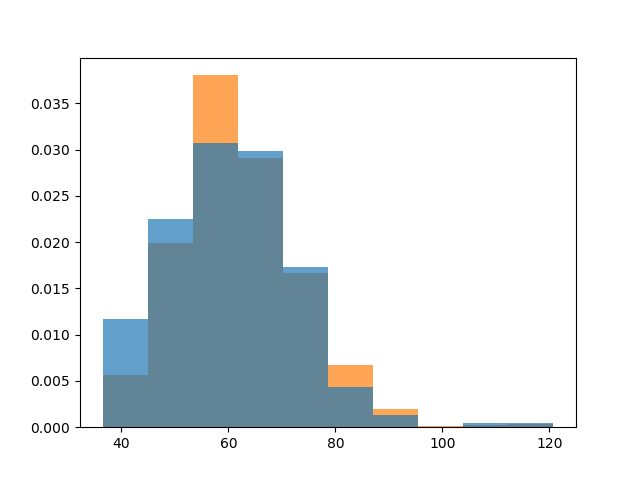

(array([ 0.00566366,  0.01993316,  0.03802746,  0.02912741,  0.01662322,
         0.00669342,  0.00191241,  0.00014711,  0.00022066,  0.00029422]),
 array([  36.47166667,   44.90033333,   53.329     ,   61.75766667,
          70.18633333,   78.615     ,   87.04366667,   95.47233333,
         103.901     ,  112.32966667,  120.75833333]),
 <a list of 10 Patch objects>)

In [43]:
plt.hist(df[keyx][df["Club"].isin(clubs)]/60,label = "clubbed", normed = True, alpha = 0.7)
plt.hist(df[keyx]/60,label = "unclubbed", zorder = -99, normed= True, alpha = 0.7)


<IPython.core.display.Javascript object>


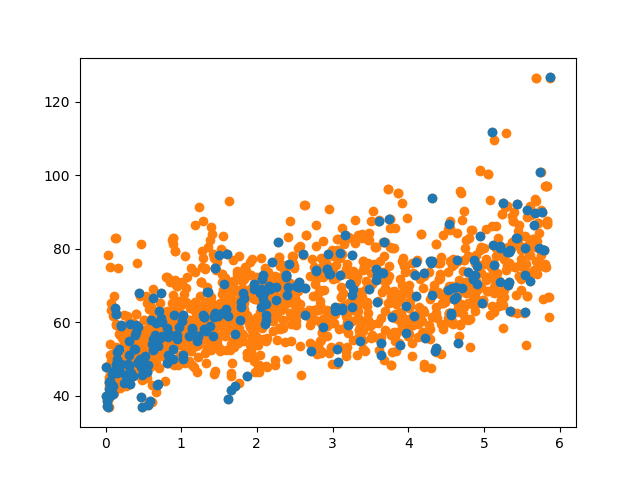

In [46]:
plt.scatter((df["subGun Time"][df["Club"].isin(clubs)] - df["subChip Time"][df["Club"].isin(clubs)])/60., df["subGun Time"][df["Club"].isin(clubs)]/60.)
plt.scatter((df["subGun Time"] - df["subChip Time"])/60., df["subGun Time"]/60., zorder = -99)

In [44]:
print(df[keyx].mean()/60.)
print(df[keyx][df["Club"].isin(clubs)].mean()/60.)

62.066337053110196
60.520030413625314


In [ ]:
df[["Club", "Name", "subChip Time"]][df["Club"].isin(clubs)]

In [ ]:
# convert_to_ap_Time(df)
t0 = Time("2017-04-26T00:00:00.000", format="isot")

In [ ]:
t1 = df["Gun Time"].values[0]

In [ ]:
t1

In [ ]:
t1 - t0

In [ ]:
col = df["Gun Time"] - t0

In [ ]:
x = col[0]

In [ ]:
x.

In [ ]:
col.sec